In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
from glob import glob
from IPython.display import clear_output

In [3]:
femalepath = glob('data/female/*.jpg')
malepath = glob('data/male/*.jpg')

In [4]:
len(femalepath), len(malepath)

(7000, 7000)

In [5]:
ipath = femalepath[0]
img = cv2.imread(ipath)
img.shape

(489, 490, 3)

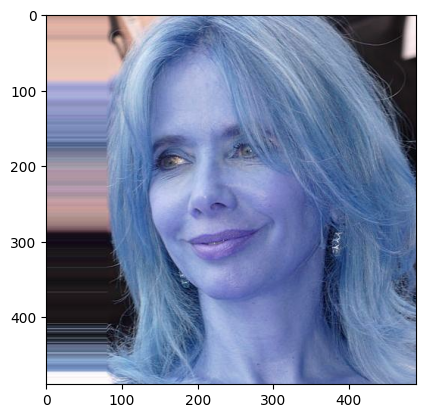

In [6]:
plt.imshow(img)

In [7]:
# Convert to gray

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(489, 490)

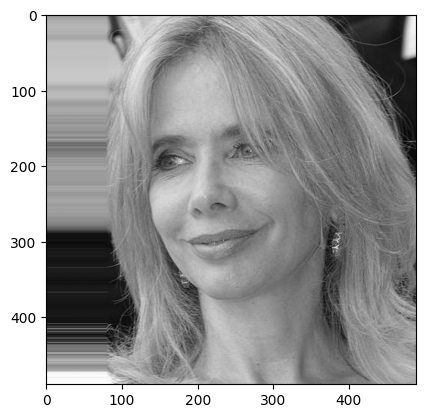

In [8]:
plt.imshow(gray, cmap='gray')

In [9]:
# Load Haar Cascade Classifier
# A Haar classifier, or a Haar cascade classifier, is a machine learning object detection program that identifies objects in an image and video.
haar = cv2.CascadeClassifier('data/model/haarcascade_frontalface_default.xml')

In [10]:
faces = haar.detectMultiScale(gray, 1.5, 5)

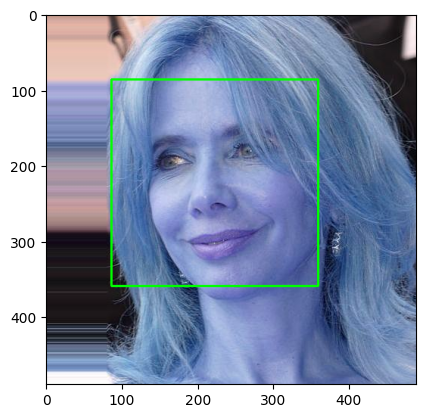

In [11]:
for x, y, w, h in faces:
    cv2.rectangle(img, (x,y), (x+w,y+h), (0, 255, 0), 2)
plt.imshow(img)

In [12]:
# Crop image

crop_img = img[y:y+h,x:x+w]

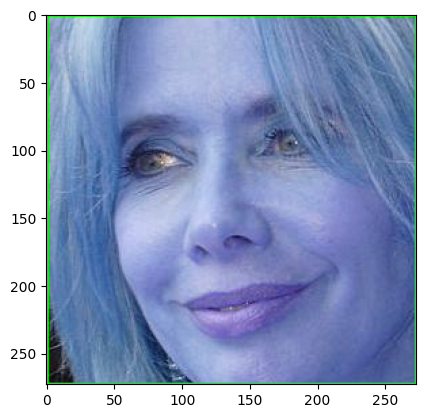

In [13]:
plt.imshow(crop_img)

In [14]:
cv2.imwrite('f_001.png', crop_img)

True

In [15]:
# Apply to all images

def extract_images(path, gender, i):
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = haar.detectMultiScale(gray, 1.5, 5)
    
    for x,y,w,h in faces:
        roi = img[y:y+h, x:x+w]
        
        if gender == 'male':
            cv2.imwrite(f'data/crop/male_crop/{gender}_{str(i).zfill(5)}.png', roi)
        else:
            cv2.imwrite(f'data/crop/female_crop/{gender}_{str(i).zfill(5)}.png', roi)

In [16]:
extract_images(femalepath[0], 'female', 1)

In [17]:
lf = len(femalepath)
lm = len(malepath)
info_txt = []

for i, path in enumerate(malepath):
    try:
        extract_images(path, 'male', i)
    except:
        info_txt.append(f'INFO: {i}/{lm} CANNOT be processed succesfully!')
    
    clear_output(wait=True)
    print(f'INFO: {i}/{lm} processed succesfully')
    for txt in info_txt:
        print(txt)
    

INFO: 6999/7000 processed succesfully


# Structuring Data

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

from glob import glob

In [19]:
female = glob('data/crop/female_crop/*.png')
male = glob('data/crop/male_crop/*.png')

In [20]:
len(female), len(male)

(3590, 2468)

In [21]:
path = female + male
len(path)

6058

## Getting size of the images

In [22]:
def getSize(path):
    img = Image.open(path)
    return img.size[0]

In [23]:
getSize(path[0])

273

## Create DataFrame

In [24]:
df = pd.DataFrame(data=path, columns=['path'])
df.head()

,path
0,data/crop/female_crop\female_00000.png
1,data/crop/female_crop\female_00001.png
2,data/crop/female_crop\female_00002.png
3,data/crop/female_crop\female_00003.png
4,data/crop/female_crop\female_00004.png


In [25]:
df.shape

(6058, 1)

In [26]:
df['size'] = df['path'].apply(getSize)

In [27]:
df.head(), df.tail()

(                                     path  size
 0  data/crop/female_crop\female_00000.png   273
 1  data/crop/female_crop\female_00001.png   273
 2  data/crop/female_crop\female_00002.png   273
 3  data/crop/female_crop\female_00003.png    81
 4  data/crop/female_crop\female_00004.png   122,
                                     path  size
 6053  data/crop/male_crop\male_06986.png   122
 6054  data/crop/male_crop\male_06989.png   122
 6055  data/crop/male_crop\male_06990.png   122
 6056  data/crop/male_crop\male_06991.png   273
 6057  data/crop/male_crop\male_06993.png    81)

# Exploratory Data Analysis

In [28]:
import seaborn as sns

In [29]:
df.describe()

,size
count,6058.000000
mean,154.373721
std,71.599719
min,24.000000
25%,81.000000
50%,122.000000
75%,182.000000
max,410.000000


<Axes: ylabel='size'>

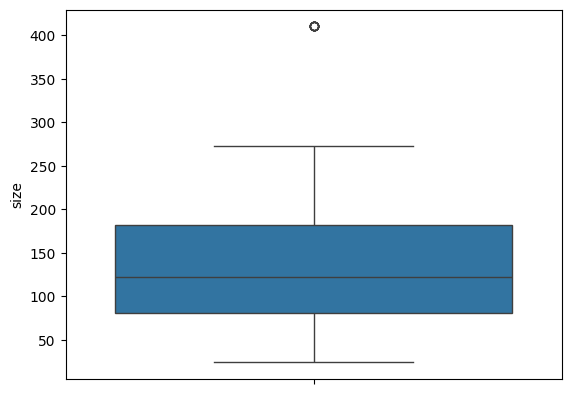

In [30]:
# df['size'].plot(kind='box',)
sns.boxplot(data=df['size'])

<Axes: xlabel='size', ylabel='Count'>

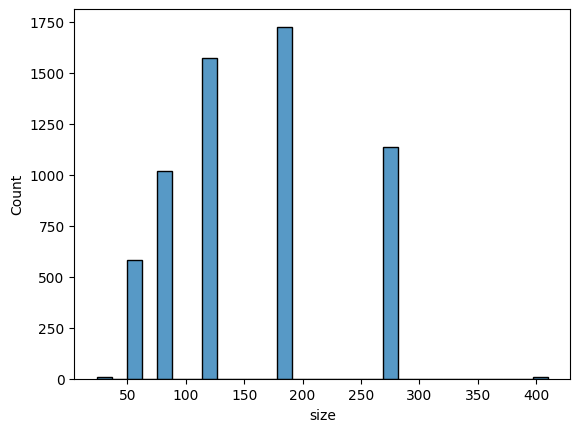

In [31]:
sns.histplot(data=df['size'], bins=30)

### So, from analysis I will resize the images to 100 x 100 form and remove images with the size <= 54 

In [32]:
df_new = df[df['size'] > 60]

In [33]:
df, df_new

(                                        path  size
 0     data/crop/female_crop\female_00000.png   273
 1     data/crop/female_crop\female_00001.png   273
 2     data/crop/female_crop\female_00002.png   273
 3     data/crop/female_crop\female_00003.png    81
 4     data/crop/female_crop\female_00004.png   122
 ...                                      ...   ...
 6053      data/crop/male_crop\male_06986.png   122
 6054      data/crop/male_crop\male_06989.png   122
 6055      data/crop/male_crop\male_06990.png   122
 6056      data/crop/male_crop\male_06991.png   273
 6057      data/crop/male_crop\male_06993.png    81
 
 [6058 rows x 2 columns],
                                         path  size
 0     data/crop/female_crop\female_00000.png   273
 1     data/crop/female_crop\female_00001.png   273
 2     data/crop/female_crop\female_00002.png   273
 3     data/crop/female_crop\female_00003.png    81
 4     data/crop/female_crop\female_00004.png   122
 ...                                

In [34]:
string = df_new['path'][0]
def gender(string):
    try:
        return string.split('_')[0].split('/')[-1]
    except:
        return None

In [35]:
df['gender'] = df['path'].apply(gender)

In [36]:
df

,path,size,gender
0,data/crop/female_crop\female_00000.png,273,female
1,data/crop/female_crop\female_00001.png,273,female
2,data/crop/female_crop\female_00002.png,273,female
3,data/crop/female_crop\female_00003.png,81,female
4,data/crop/female_crop\female_00004.png,122,female
...,...,...,...
6053,data/crop/male_crop\male_06986.png,122,male
6054,data/crop/male_crop\male_06989.png,122,male
6055,data/crop/male_crop\male_06990.png,122,male
6056,data/crop/male_crop\male_06991.png,273,male


gender
female    0.592605
male      0.407395
Name: proportion, dtype: float64


<Axes: ylabel='proportion'>

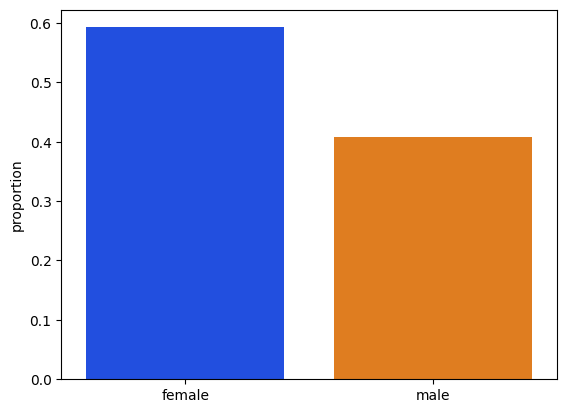

In [37]:
sns.set_palette(sns.color_palette(palette='bright'), color_codes=True)
print(df['gender'].value_counts(normalize=True))
sns.barplot( x=df['gender'].unique(), y=df['gender'].value_counts(normalize=True), hue=('female','male'))

## Observations:
1. 60% female images, 40% male
2. Alle image sizes is greater than or equal to 81

### Conclusion:
Resizing all images in df_new to 100 x 100 array

# Resizing images

In [38]:
def resize_image(path_to_resize):
    try:
        # Step 1 - read the image:
        img = cv2.imread(path_to_resize)
        # Step 2 - convert to grayscale:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Step 3 - resize into 100 x 100 array:
        size = gray.shape[0]
        if size >= 100: 
            gray_re = cv2.resize(gray, (100,100),cv2.INTER_AREA) # SHRINK
        else:
            gray_re = cv2.resize(gray, (100,100),cv2.INTER_CUBIC) # ENLARGE
        # Step 4 - Flatten Image - convert to 1x10,000:
        flat_img = gray_re.flatten()
        return flat_img
    except:
        return None

In [39]:
len(resize_image(path[0]))

10000

In [40]:
df_new['gender'] = df_new['path'].apply(func=gender,)
df_new.head()

C:\Users\Piotr Karwacki\AppData\Local\Temp\ipykernel_13548\3207907319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['gender'] = df_new['path'].apply(func=gender,)


,path,size,gender
0,data/crop/female_crop\female_00000.png,273,female
1,data/crop/female_crop\female_00001.png,273,female
2,data/crop/female_crop\female_00002.png,273,female
3,data/crop/female_crop\female_00003.png,81,female
4,data/crop/female_crop\female_00004.png,122,female


In [41]:
# Structuring function:

df_new['structured_data'] = df_new['path'].apply(resize_image)

C:\Users\Piotr Karwacki\AppData\Local\Temp\ipykernel_13548\594890435.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['structured_data'] = df_new['path'].apply(resize_image)


In [42]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5469 entries, 0 to 6057
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   path             5469 non-null   object
 1   size             5469 non-null   int64 
 2   gender           5469 non-null   object
 3   structured_data  5469 non-null   object
dtypes: int64(1), object(3)
memory usage: 342.7+ KB


In [43]:
# copy and expand columns
df1 = df_new['structured_data'].apply(pd.Series)

In [44]:
df1

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,188,180,184,188,173,179,192,178,216,219,...,109,111,115,116,122,116,119,120,117,111
1,188,180,184,188,173,179,192,178,216,219,...,109,111,115,116,122,116,119,120,117,111
2,17,17,18,22,20,20,25,23,25,29,...,194,193,194,195,195,195,194,194,194,195
3,24,29,31,29,25,21,22,25,28,27,...,5,14,18,13,1,3,20,31,32,23
4,12,11,12,14,16,23,21,29,40,41,...,171,189,201,211,219,214,221,213,166,134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6053,111,96,95,93,74,75,85,84,62,61,...,215,234,220,225,230,221,222,230,231,231
6054,41,38,36,39,43,42,46,51,49,49,...,221,221,220,220,220,221,223,225,224,222
6055,133,96,85,92,83,80,78,75,74,74,...,152,145,146,143,138,138,134,138,140,142
6056,156,157,158,158,159,160,161,164,164,165,...,247,30,12,16,9,14,14,17,19,18


In [45]:
df2 = pd.concat((df_new['gender'], df1), axis=1)

In [46]:
df2

,gender,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,female,188,180,184,188,173,179,192,178,216,...,109,111,115,116,122,116,119,120,117,111
1,female,188,180,184,188,173,179,192,178,216,...,109,111,115,116,122,116,119,120,117,111
2,female,17,17,18,22,20,20,25,23,25,...,194,193,194,195,195,195,194,194,194,195
3,female,24,29,31,29,25,21,22,25,28,...,5,14,18,13,1,3,20,31,32,23
4,female,12,11,12,14,16,23,21,29,40,...,171,189,201,211,219,214,221,213,166,134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6053,male,111,96,95,93,74,75,85,84,62,...,215,234,220,225,230,221,222,230,231,231
6054,male,41,38,36,39,43,42,46,51,49,...,221,221,220,220,220,221,223,225,224,222
6055,male,133,96,85,92,83,80,78,75,74,...,152,145,146,143,138,138,134,138,140,142
6056,male,156,157,158,158,159,160,161,164,164,...,247,30,12,16,9,14,14,17,19,18


Text(0.5, 1.0, 'Label: female')

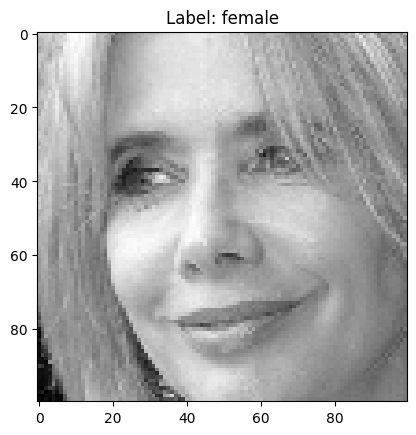

In [47]:
plt.imshow(df2.loc[0][1:].values.reshape(100,100).astype(int), cmap='gray')
plt.title("Label: "+df2.loc[0]['gender'])

In [48]:
import pickle

In [49]:
pickle.dump(df2,open('data/dataframe_images_100_100.pickle', 'wb'))

 # Data Preprocessing

In [50]:
# Load Pickle Data

df = pickle.load(open('data/dataframe_images_100_100.pickle', 'rb'))

In [51]:
df.head()

,gender,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,female,188,180,184,188,173,179,192,178,216,...,109,111,115,116,122,116,119,120,117,111
1,female,188,180,184,188,173,179,192,178,216,...,109,111,115,116,122,116,119,120,117,111
2,female,17,17,18,22,20,20,25,23,25,...,194,193,194,195,195,195,194,194,194,195
3,female,24,29,31,29,25,21,22,25,28,...,5,14,18,13,1,3,20,31,32,23
4,female,12,11,12,14,16,23,21,29,40,...,171,189,201,211,219,214,221,213,166,134


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5469 entries, 0 to 6057
Columns: 10001 entries, gender to 9999
dtypes: object(1), uint8(10000)
memory usage: 52.2+ MB


In [53]:
df.isnull().sum()

gender    0
0         0
1         0
2         0
3         0
         ..
9995      0
9996      0
9997      0
9998      0
9999      0
Length: 10001, dtype: int64

## Data Preprocessing:
- Remove missing values
- Data normalization (min max scaling)

In [54]:
# remove missing values

df.dropna(axis=0, inplace=True)

In [55]:
df

,gender,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,female,188,180,184,188,173,179,192,178,216,...,109,111,115,116,122,116,119,120,117,111
1,female,188,180,184,188,173,179,192,178,216,...,109,111,115,116,122,116,119,120,117,111
2,female,17,17,18,22,20,20,25,23,25,...,194,193,194,195,195,195,194,194,194,195
3,female,24,29,31,29,25,21,22,25,28,...,5,14,18,13,1,3,20,31,32,23
4,female,12,11,12,14,16,23,21,29,40,...,171,189,201,211,219,214,221,213,166,134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6053,male,111,96,95,93,74,75,85,84,62,...,215,234,220,225,230,221,222,230,231,231
6054,male,41,38,36,39,43,42,46,51,49,...,221,221,220,220,220,221,223,225,224,222
6055,male,133,96,85,92,83,80,78,75,74,...,152,145,146,143,138,138,134,138,140,142
6056,male,156,157,158,158,159,160,161,164,164,...,247,30,12,16,9,14,14,17,19,18


In [56]:
df.isnull().sum()

gender    0
0         0
1         0
2         0
3         0
         ..
9995      0
9996      0
9997      0
9998      0
9999      0
Length: 10001, dtype: int64

In [57]:
# Split the data into 2 parts:
X = df.iloc[:, 1:].values # Independent values
y = df.iloc[:, 0].values # Dependand value

In [58]:
X.shape

(5469, 10000)

In [59]:
y.shape

(5469,)

# Min Max Scaling

## Xnorm = $\frac {x - minValue} { maxValue - minValue}$

In [60]:
X.min(), X.max()

(np.uint8(0), np.uint8(255))

In [61]:
X_norm = X / X.max()

In [62]:
X_norm

array([[0.7372549 , 0.70588235, 0.72156863, ..., 0.47058824, 0.45882353,
        0.43529412],
       [0.7372549 , 0.70588235, 0.72156863, ..., 0.47058824, 0.45882353,
        0.43529412],
       [0.06666667, 0.06666667, 0.07058824, ..., 0.76078431, 0.76078431,
        0.76470588],
       ...,
       [0.52156863, 0.37647059, 0.33333333, ..., 0.54117647, 0.54901961,
        0.55686275],
       [0.61176471, 0.61568627, 0.61960784, ..., 0.06666667, 0.0745098 ,
        0.07058824],
       [0.38039216, 0.42745098, 0.49803922, ..., 0.11764706, 0.1372549 ,
        0.17647059]])

In [63]:
X_norm.shape

(5469, 10000)

In [64]:
y

array(['female', 'female', 'female', ..., 'male', 'male', 'male'],
      dtype=object)

In [65]:
# female = 1
# male = 0
y_norm = np.where(y=='female', 1, 0)

In [66]:
y_norm

array([1, 1, 1, ..., 0, 0, 0])

In [67]:
# Saving X and y
np.savez('data/data_10000_norm.npz', X_norm, y_norm)

# Eigen Images

In [68]:
data = np.load('data/data_10000_norm.npz')

In [69]:
data.files

['arr_0', 'arr_1']

In [70]:
X = data['arr_0'] # Independent features
y = data['arr_1'] # Target value

In [71]:
X.shape, y.shape

((5469, 10000), (5469,))

In [72]:
# axis = 0 - column
# axis = 1 - row
X1 = X - X.mean(axis=0)

In [73]:
from sklearn.decomposition import PCA

In [74]:
pca = PCA(n_components=None,whiten=True,svd_solver='auto')

In [75]:
x_pca = pca.fit_transform(X1)

In [76]:
x_pca.shape

(5469, 5469)

In [77]:
eigen_ratio = pca.explained_variance_ratio_
eigen_ratio_cum = np.cumsum(eigen_ratio)

In [78]:
eigen_ratio, eigen_ratio_cum

(array([2.52768541e-01, 1.14491363e-01, 1.03657853e-01, ...,
        7.23705259e-35, 2.94211199e-35, 9.86500894e-36]),
 array([0.25276854, 0.3672599 , 0.47091776, ..., 1.        , 1.        ,
        1.        ]))

Text(0, 0.5, 'Cumulative Explained Variance ratio')

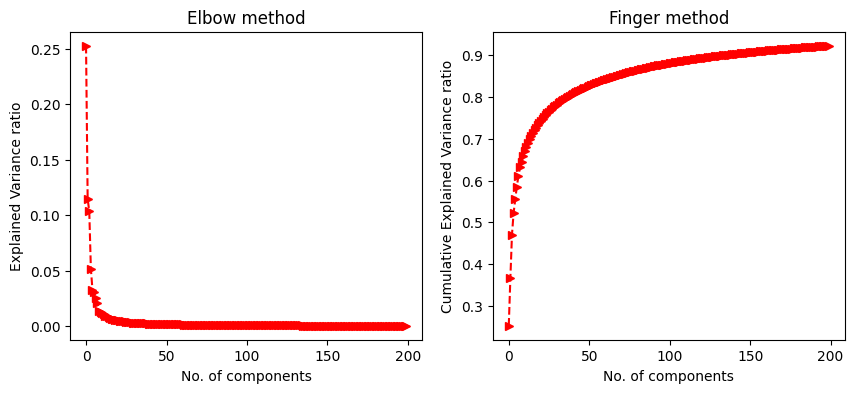

In [79]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(eigen_ratio[:200], 'r>--')
plt.title('Elbow method')
plt.xlabel('No. of components')
plt.ylabel('Explained Variance ratio')
plt.subplot(1,2,2)
plt.title('Finger method')
plt.plot(eigen_ratio_cum[:200], 'r>--')
plt.xlabel('No. of components')
plt.ylabel('Cumulative Explained Variance ratio')

## Conclusions:
- Using elbow method, from 10000 componens we can consider needing only 50 to explain about 80% of the data
- Since I consider components between 25 to 30, the explained variance is around 75%
- In order to get minimum 80% explained variance, I'm considering 50 components

In [80]:
pca_50 = PCA(n_components=50,whiten=True,svd_solver='auto')
x_pca_50 = pca_50.fit_transform(X1)

In [81]:
x_pca_50.shape

(5469, 50)

In [82]:
# Saving pca
pickle.dump(pca_50, open('data/pca_50.pickle','wb'))

In [83]:
# Considering 50 components and inverse transform
x_pca_inv = pca_50.inverse_transform(x_pca_50)

In [84]:
x_pca_inv.shape

(5469, 10000)

In [85]:
# consider one image (one row)
eig_img = x_pca_inv[0,:]
eig_img = eig_img.reshape((100,100))
eig_img.shape

(100, 100)

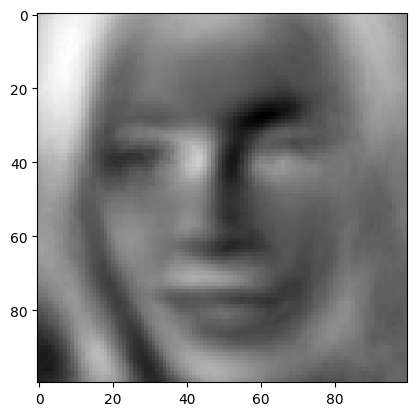

In [86]:
plt.imshow(eig_img, cmap='gray')

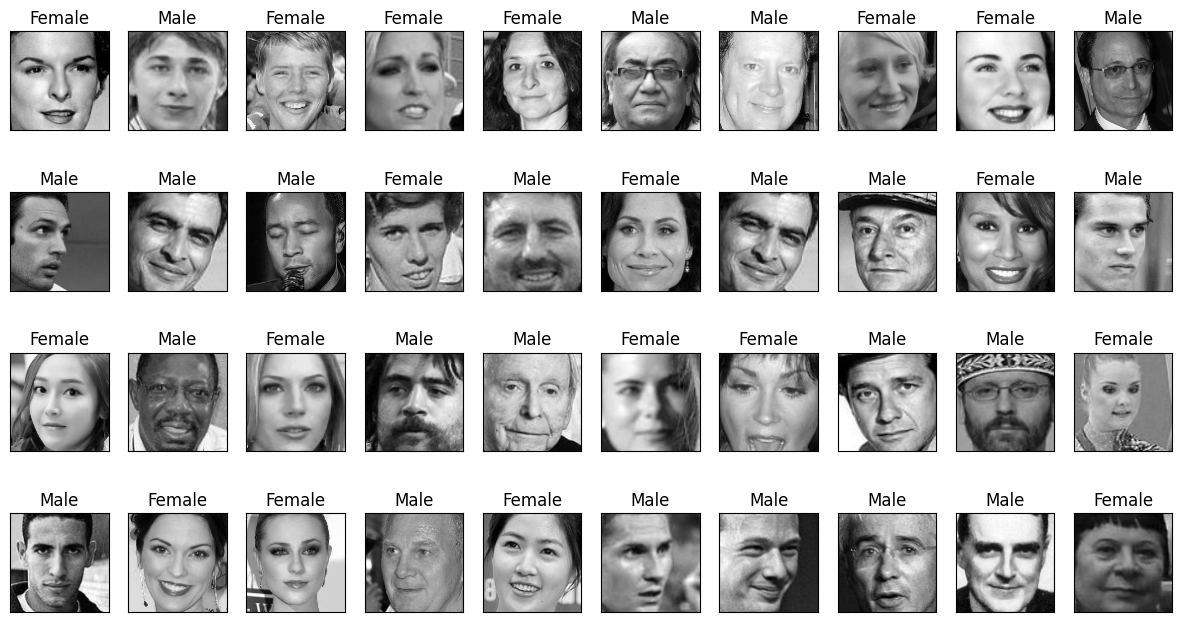

====================Eigen Images====================


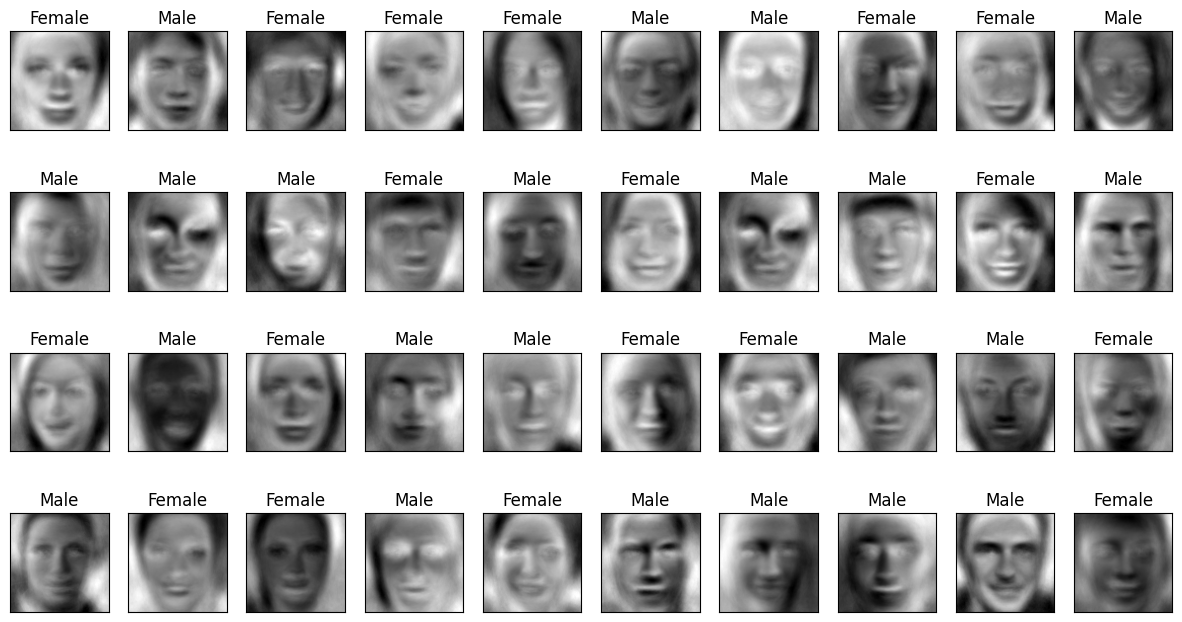

In [87]:
def label(y):
    if y==0:
        return 'Male'
    else:
        return 'Female'

np.random.randint(1001)
pics = np.random.randint(0, 5467, 40)
plt.figure(figsize=(15,8))

for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = X[pic:pic+1].reshape(100,100)
    plt.imshow(img, cmap='gray')
    plt.title(label(y[pic]))
    plt.xticks([])
    plt.yticks([])
plt.show()

print("="*20+"Eigen Images"+"="*20)

plt.figure(figsize=(15,8))

for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = x_pca_inv[pic:pic+1].reshape(100,100)
    plt.imshow(img, cmap='gray')
    plt.title(label(y[pic]))
    plt.xticks([])
    plt.yticks([])
plt.show()
    

In [88]:
# Saving
np.savez("data/data_pca_50_y_mean.pickle",x_pca_50,y,X.mean(axis=0),)

# Training ML Model

In [89]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [90]:
data = np.load('data/data_pca_50_y_mean.pickle.npz')
data.files

['arr_0', 'arr_1', 'arr_2']

In [91]:
X = data['arr_0']
y = data['arr_1']
mean = data['arr_2']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4375, 50), (1094, 50), (4375,), (1094,))

In [93]:
model = SVC(C=1.0,kernel='rbf',gamma=0.01, probability=True)

In [94]:
model.fit(X_train,y_train)
print('Model trained succesfully')

Model trained succesfully


In [95]:
model

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,0.01
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [96]:
# score
model.score(X_train, y_train)

0.8644571428571428

In [97]:
model.score(X_test, y_test)

0.7861060329067642

# Test and Evaluate Model
- Confusion Matrix
- Classification Report
- Kappa Score
- ROC and AUC (probability)

In [98]:
from sklearn import metrics

In [99]:
y_pred = model.predict(X_test) # Predictor values
y_prob = model.predict_proba(X_test) # Probability

In [100]:
cm = metrics.confusion_matrix(y_test, y_pred)

In [101]:
cm = np.concatenate((cm, cm.sum(axis=0).reshape(1,-1)), axis=0)
cm = np.concatenate((cm, cm.sum(axis=1).reshape(-1,1)), axis=1)

In [136]:
cm, cm[0,2]

(array([[ 305,  137,  442],
        [  97,  555,  652],
        [ 402,  692, 1094]]),
 np.int64(442))

Text(0, 0.5, 'Actual Values')

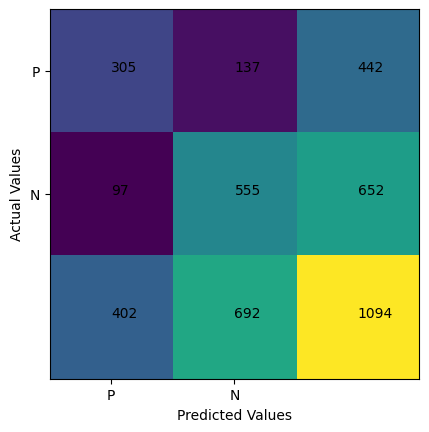

In [135]:
plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(i,j,cm[j,i])
plt.xticks([0,1], labels=('P','N'))
plt.yticks([0,1], labels=('P','N'))
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

In [137]:
# Pierwsza wartość - wiersz, druga - kolumna
# Wartość False: 1 - male, wartość True: 0 - female
TP = cm[0,0]
TN = cm[1,1]
FN = cm[0,1]
FP = cm[1,0]

print('TP:', TP, 'TN:', TN, 'FP:', FP, 'FN:', FN)

acc = (TP + TN) / (TP + TN + FP + FN)
err = (FP + FN) / (TP + TN + FP + FN)
rec_m = TP / (TP + FN)
rec_f = TN / (TN + FP)
prec_m = TP / (TP + FP)
prec_f = TN / (TN + FN)
spec = TN / (TN + FP)
F1m = 2 * TP / (2*TP + FP + FN)
F1f = 2 * TN / (2*TN + FP + FN)
print('Accuracy - jakość klasyfikacji:', acc)
print('Error - poziom błędu:', err)
print('Recall - czułość (male):', rec_m)
print('Recall - czułość: (female)', rec_f)
print('Precision (male):', prec_m)
print('Precision (female):', prec_f)
print('Specificity:', spec)
print('F1-Score (male):', F1m)
print('F1-Score (female):', F1f)

TP: 305 TN: 555 FP: 97 FN: 137
Accuracy - jakość klasyfikacji: 0.7861060329067642
Error - poziom błędu: 0.21389396709323583
Recall - czułość (male): 0.6900452488687783
Recall - czułość: (female) 0.8512269938650306
Precision (male): 0.7587064676616916
Precision (female): 0.8020231213872833
Specificity: 0.8512269938650306
F1-Score (male): 0.7227488151658767
F1-Score (female): 0.8258928571428571


In [127]:
# Classification report
cr = metrics.classification_report(y_test, y_pred, target_names=('male','female'), output_dict=True)

In [128]:
pd.DataFrame(cr).T

,precision,recall,f1-score,support
male,0.758706,0.690045,0.722749,442.000000
female,0.802023,0.851227,0.825893,652.000000
accuracy,0.786106,0.786106,0.786106,0.786106
macro avg,0.780365,0.770636,0.774321,1094.000000
weighted avg,0.784522,0.786106,0.784220,1094.000000


In [107]:
# Kappa Score
metrics.cohen_kappa_score(y_test, y_pred)

0.5492774240802298

# ROC and AUC

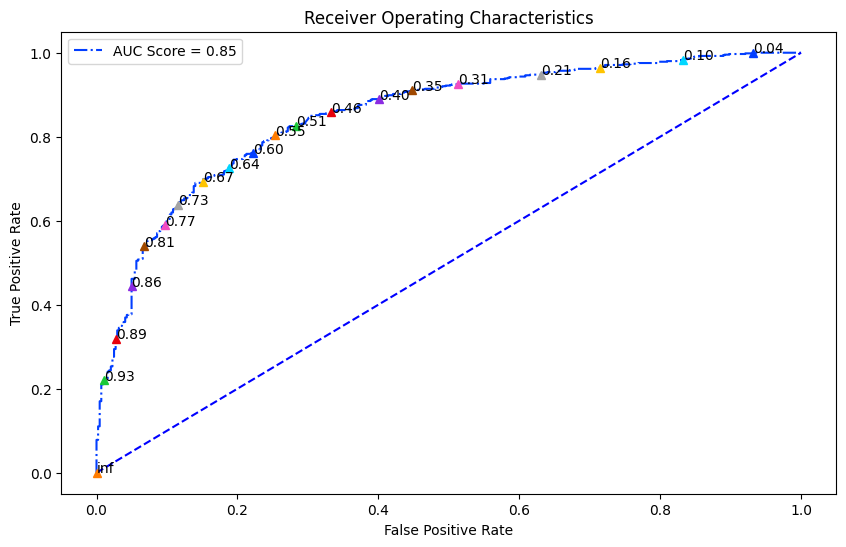

In [108]:
# roc for female
fpr, tpr, thresh = metrics.roc_curve(y_test, y_prob[:, 1])
auc_score = metrics.auc(fpr, tpr)

plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, '-.')
plt.plot([0,1], [0,1], 'b--')

for i in range(0,len(thresh),20):
    plt.plot(fpr[i], tpr[i], '^')
    plt.text(fpr[i], tpr[i], f"{thresh[i]:.2f}")

plt.legend([f'AUC Score = {auc_score:.2f}'])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.show()

# Hyper Parameter Tuning

In [138]:
model_tune = SVC()

In [139]:
from sklearn.model_selection import GridSearchCV

In [145]:
param_grid = {'C': [1, 10, 20, 30, 50, 100], 
             'kernel': ['rbf', 'poly'],
              'gamma': [0.1, 0.05, 0.01, 0.001, 0.002, 0.005],
              'coef0': [0.0, 1.0]             
             }

In [146]:
model_grid = GridSearchCV(estimator=model_tune, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1)

In [147]:
model_grid.fit(X, y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


,estimator,SVC()
,param_grid,"{'C': [1, 10, ...], 'coef0': [0.0, 1.0], 'gamma': [0.1, 0.05, ...], 'kernel': ['rbf', 'poly']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [150]:
model_grid.best_index_, model_grid.best_estimator_, model_grid.best_params_

(np.int64(2),
 SVC(C=1, gamma=0.05),
 {'C': 1, 'coef0': 0.0, 'gamma': 0.05, 'kernel': 'rbf'})

In [151]:
model_grid.best_score_

np.float64(0.7878942112930716)

# With Best Parameters build Machine Learning Model

In [156]:
model_best = SVC(C=1, kernel='rbf', gamma=0.05, coef0=0.0, probability=True)

In [158]:
model_best.fit(X_train, y_train)
model_best.score(X_test, y_test)

0.8071297989031079

# Evaluate Best Model

In [159]:
y_pred_best = model_best.predict(X_test) # Predictor values
y_prob_best = model_best.predict_proba(X_test) # Probability

In [160]:
cm_best = metrics.confusion_matrix(y_test, y_pred_best)

In [161]:
cm_best = np.concatenate((cm_best, cm_best.sum(axis=0).reshape(1,-1)), axis=0)
cm_best = np.concatenate((cm_best, cm_best.sum(axis=1).reshape(-1,1)), axis=1)

In [162]:
cm_best

array([[ 307,  135,  442],
       [  76,  576,  652],
       [ 383,  711, 1094]])

Text(0, 0.5, 'Actual Values')

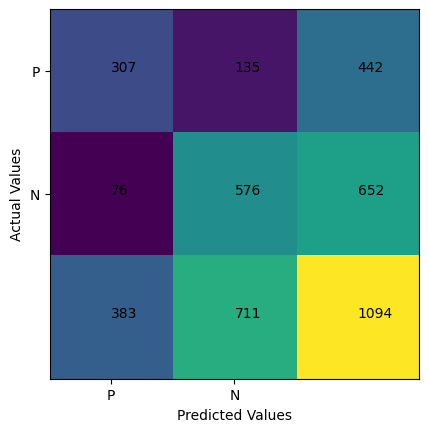

In [163]:
plt.imshow(cm_best)
for i in range(3):
    for j in range(3):
        plt.text(i,j,cm_best[j,i])
plt.xticks([0,1], labels=('P','N'))
plt.yticks([0,1], labels=('P','N'))
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

In [164]:
# Pierwsza wartość - wiersz, druga - kolumna
# Wartość False: 1 - male, wartość True: 0 - female
TP = cm_best[0,0]
TN = cm_best[1,1]
FN = cm_best[0,1]
FP = cm_best[1,0]

print('TP:', TP, 'TN:', TN, 'FP:', FP, 'FN:', FN)

acc = (TP + TN) / (TP + TN + FP + FN)
err = (FP + FN) / (TP + TN + FP + FN)
rec_m = TP / (TP + FN)
rec_f = TN / (TN + FP)
prec_m = TP / (TP + FP)
prec_f = TN / (TN + FN)
spec = TN / (TN + FP)
F1m = 2 * TP / (2*TP + FP + FN)
F1f = 2 * TN / (2*TN + FP + FN)
print('Accuracy - jakość klasyfikacji:', acc)
print('Error - poziom błędu:', err)
print('Recall - czułość (male):', rec_m)
print('Recall - czułość: (female)', rec_f)
print('Precision (male):', prec_m)
print('Precision (female):', prec_f)
print('Specificity:', spec)
print('F1-Score (male):', F1m)
print('F1-Score (female):', F1f)

TP: 307 TN: 576 FP: 76 FN: 135
Accuracy - jakość klasyfikacji: 0.8071297989031079
Error - poziom błędu: 0.19287020109689215
Recall - czułość (male): 0.6945701357466063
Recall - czułość: (female) 0.8834355828220859
Precision (male): 0.8015665796344648
Precision (female): 0.810126582278481
Specificity: 0.8834355828220859
F1-Score (male): 0.7442424242424243
F1-Score (female): 0.8451944240645635


In [165]:
# Classification report
cr_best = metrics.classification_report(y_test, y_pred_best, target_names=('male','female'), output_dict=True)

In [166]:
pd.DataFrame(cr_best).T

,precision,recall,f1-score,support
male,0.801567,0.694570,0.744242,442.00000
female,0.810127,0.883436,0.845194,652.00000
accuracy,0.807130,0.807130,0.807130,0.80713
macro avg,0.805847,0.789003,0.794718,1094.00000
weighted avg,0.806668,0.807130,0.804408,1094.00000


In [167]:
# Kappa Score
metrics.cohen_kappa_score(y_test, y_pred_best)

0.5907038927050345

# ROC and AUC for Best Model

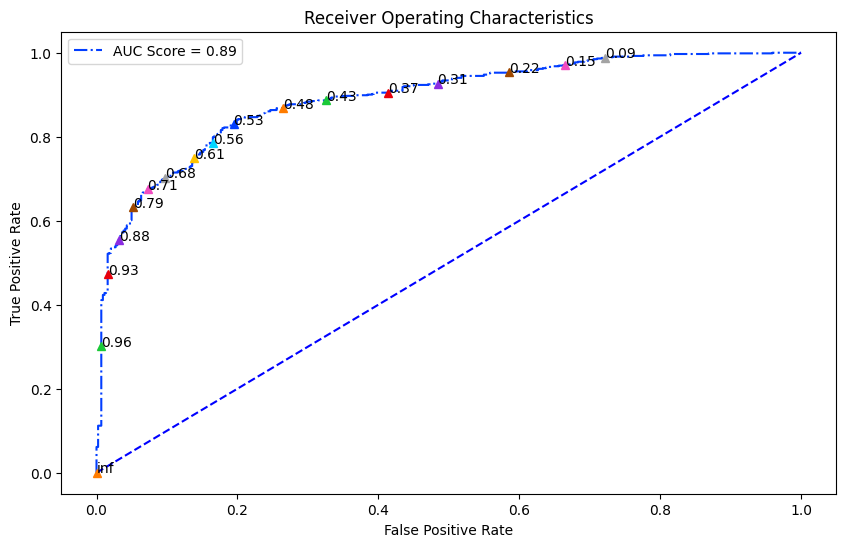

In [168]:
# roc for female
fpr_best, tpr_best, thresh_best = metrics.roc_curve(y_test, y_prob_best[:, 1])
auc_score_best = metrics.auc(fpr_best, tpr_best)

plt.figure(figsize=(10,6))
plt.plot(fpr_best, tpr_best, '-.')
plt.plot([0,1], [0,1], 'b--')

for i in range(0,len(thresh_best),20):
    plt.plot(fpr_best[i], tpr_best[i], '^')
    plt.text(fpr_best[i], tpr_best[i], f"{thresh_best[i]:.2f}")

plt.legend([f'AUC Score = {auc_score_best:.2f}'])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.show()

In [169]:
pickle.dump(model_best,open('model_svm.pickle', 'wb'))

In [172]:
pickle.dump(mean, open('data/model/mean_preprocess.pickle','wb'))